В данной лабораторной работе используется датасет [seeds](https://archive.ics.uci.edu/ml/datasets/seeds#), в котором содержатся геометрические параметры семени 3 видов пшениц (по 70 наблюдений каждого вида).

Нужно решить задачу кластеризации с помощью алгоритма [иерархической кластеризации](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering).

Примеры визуализации:
* [построение дендрограммы](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html);
* [диаграмма рассеивания](https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html).

In [1]:
import numpy as np
import pandas as pd

from itertools import cycle, islice

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import completeness_score, homogeneity_score

In [2]:
def scatterplot_clustering(model, pca_data, true_labels):
    x_min, x_max = pca_data[:, 0].min() - 1, pca_data[:, 0].max() + 1
    y_min, y_max = pca_data[:, 1].min() - 1, pca_data[:, 1].max() + 1

    pred_labels = model.labels_.astype(np.int)

    color_codes = [
        '#377eb8', '#ff7f00', '#4daf4a',
        '#f781bf', '#a65628','#984ea3',
        '#999999', '#e41a1c', '#dede00'
    ]

    true_colors = np.array(list(islice(cycle(color_codes), int(max(true_labels) + 1))))
    pred_colors = np.array(list(islice(cycle(color_codes), int(max(pred_labels) + 1))))

    plt.figure(figsize=(9, 12))
    plt.subplots_adjust(
        left=.02,
        right=1.0,
        bottom=.001,
        top=1.0,
        wspace=.5,
        hspace=.5
    )

    plt.subplot(2, 1, 1)
    
    plt.scatter(pca_data[:, 0], pca_data[:, 1], s=10, color=pred_colors[pred_labels])
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title('Визуализация иерархической кластеризации (после применения МГК)')
    
    plt.subplot(2, 1, 2)
    
    plt.scatter(pca_data[:, 0], pca_data[:, 1], s=10, color=true_colors[true_labels])
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title('Визуализация иерархической кластеризации (после применения МГК, реальные значения)')
    
    plt.show()

In [3]:
seeds = pd.read_csv('seeds.csv')
seeds.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,wheat_class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
cluster_data = seeds.drop(columns=['wheat_class'])
cluster_data.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [5]:
n_clusters = 3

In [6]:
hierarchical = AgglomerativeClustering(n_clusters)
hierarchical.fit(cluster_data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [7]:
h_score = homogeneity_score(seeds.wheat_class, hierarchical.labels_)
c_score = completeness_score(seeds.wheat_class, hierarchical.labels_)
print('Homogeneity score: {:.3f}'.format(h_score))
print('Completeness score: {:.3f}'.format(c_score))

Homogeneity score: 0.727
Completeness score: 0.735


In [8]:
reduced_data = PCA(n_components=2).fit_transform(cluster_data)
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
hierarchical.fit(reduced_data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [9]:
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1

pred = hierarchical.labels_.astype(np.int)

color_codes = [
    '#377eb8', '#ff7f00', '#4daf4a',
    '#f781bf', '#a65628','#984ea3',
    '#999999', '#e41a1c', '#dede00'
]

colors = np.array(list(islice(cycle(color_codes), int(max(pred) + 1))))

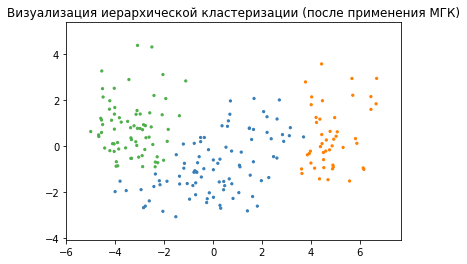

In [10]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=5, color=colors[pred])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title('Визуализация иерархической кластеризации (после применения МГК)')
plt.show()

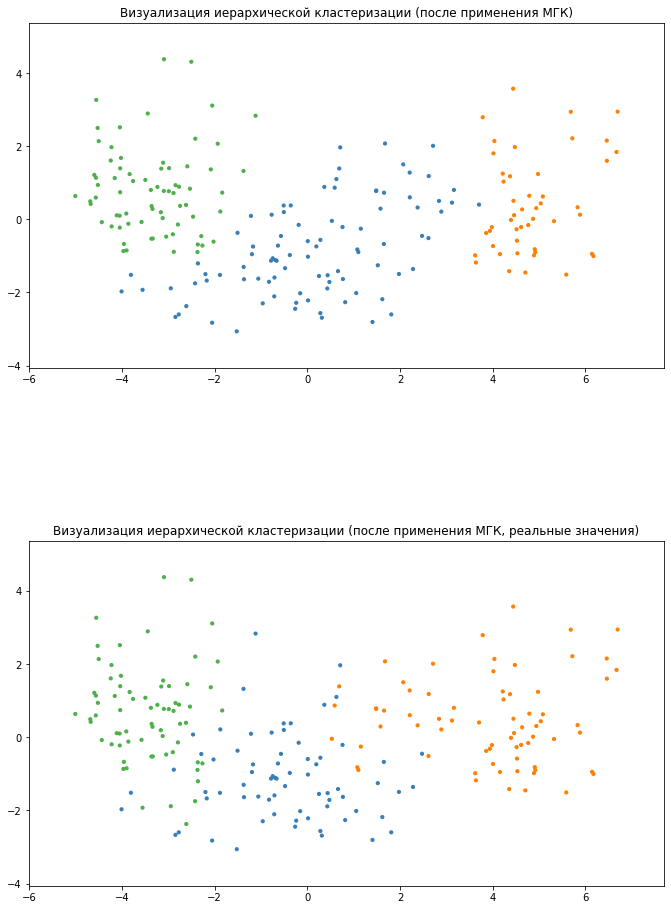

In [11]:
scatterplot_clustering(hierarchical, reduced_data, seeds.wheat_class - 1)

In [12]:
hierarchical = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hierarchical.fit(cluster_data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=0, linkage='ward',
                        memory=None, n_clusters=None)

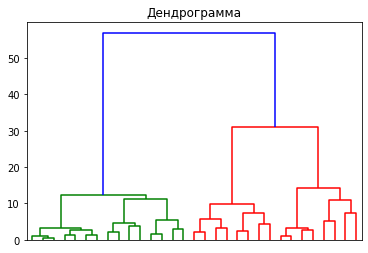

In [13]:
counts = np.zeros(hierarchical.children_.shape[0])
n_samples = len(hierarchical.labels_)

for i, merge in enumerate(hierarchical.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack(
    [
        hierarchical.children_,
        hierarchical.distances_,
        counts
    ]
).astype(float)

# Plot the corresponding dendrogram
dendrogram(linkage_matrix, truncate_mode='level', p=4)
plt.title('Дендрограмма')
plt.xticks(())
plt.show()